# Как провести корреляционный анализ

In [6]:
import pandas as pd

import numpy as np
from scipy import stats

import seaborn as sns

In [47]:
from matplotlib import rcParams
# a4_dims = (11.7, 8.27)
a5_dims = (11.7/2, 8.27/2)
rcParams['figure.figsize'] = a5_dims  # Теперь все графики будут иметь заданный размер

In [49]:
data = pd.read_csv('cardio.csv', sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


<b>Категориальные признаки:</b>
- gender
- smoke
- alco
- active
- cardio

<b>Порядковые признаки:</b>
- cholesterol
- gluc


Все остальные – числовые непрерывные признаки.

### Анализ корреляций числовых признаков

In [55]:
numeric = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
data[numeric].corr()

,age,height,weight,ap_hi,ap_lo
age,1.000000,-0.081515,0.053684,0.020764,0.017647
height,-0.081515,1.000000,0.290968,0.005488,0.006150
weight,0.053684,0.290968,1.000000,0.030702,0.043710
ap_hi,0.020764,0.005488,0.030702,1.000000,0.016086
ap_lo,0.017647,0.006150,0.043710,0.016086,1.000000


<Axes: >

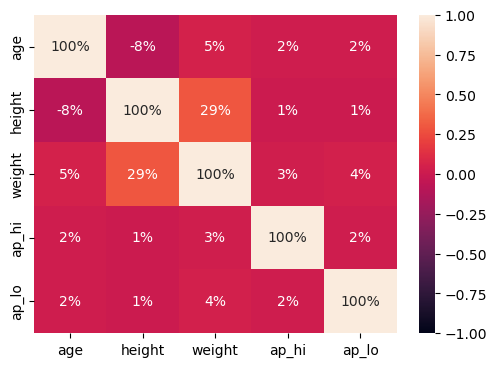

In [57]:
sns.heatmap(data[numeric].corr(), vmin=-1, vmax=1, annot=True, fmt='.0%')

<b>Выводы:</b>
Слабая корреляция наблюдается между переменными ap_hi и ap_lo (верхнее и нижнее артериальное давление). Достаточно высокой является корреляция между ростом и весом. Кроме того, можно заметить, что вес в большей степени связан с давлением, чем рост.

### Статистическая значимость коэффицента корреляции

Насколько высокой должна быть степень корреляции, чтобы можно было вообще говорить о какой-либо неслучайной взаимосвязи между признаками?

---
Корреляция между ростом и весом является достаточно высокой, а вес больше связан с давлением, чем рост.

In [40]:
from scipy.stats import pearsonr, spearmanr, kendalltau

In [42]:
pearsonr(data.weight, data.height)

PearsonRResult(statistic=0.2909678349914977, pvalue=0.0)

In [44]:
spearmanr(data.weight, data.cholesterol)

SignificanceResult(statistic=0.13790793370008902, pvalue=2.9847537944766864e-294)

In [46]:
kendalltau(data.weight, data.cholesterol)

SignificanceResult(statistic=0.11061576645010737, pvalue=2.4466562782805854e-291)

Так как p-value < 0.05 (типичное пороговое значение), то делаем вывод о том, что взаимосвязь (корреляция) между ростом и весом статистически значима.

Проверим, действительно ли корреляция роста и давления статистически незначима в отличие от корреляции веса и давления. Снова воспользуемся коэффициентом корреляции Пирсона.

In [50]:
pearsonr(data.weight, data.ap_hi)

PearsonRResult(statistic=0.030702208651580815, pvalue=4.480599811227082e-16)

In [52]:
pearsonr(data.height, data.ap_hi)

PearsonRResult(statistic=0.005487764158405724, pvalue=0.14652637424685358)

Значение p-value < 0.05, а значит взаимосвязь между весом и давлением статистически значима.

А в случае взаимосвязи между ростом и давлением у нас нет оснований утверждать, что между ними нет статистически подтверждённой взаимосвязи, те связь возможна, но доказать мы это не смогли.

### Анализ корреляций категориальных признаков
Корреляция между категориальными переменными не может быть измерена с помощью коэффициентов Пирсона, Спирмена и Кендалла. Коэффициенты и выводы для категориальных данных обычно строятся на основании <b>таблиц сопряжённости </b>(кросс-таблиц).

Таблицы сопряжённости представляют собой таблицы, в которых данные разбиты на строки и столбцы, чтобы показать, какие комбинации значений встречаются в наборе данных.

Рассмотрим взаимосвязь курения и сердечно-сосудистых заболеваний. Построим кросс-таблицу.

In [56]:
pd.crosstab(data.smoke, data.cardio)

cardio,0,1
smoke,,
0,31781,32050
1,3240,2929


<Axes: xlabel='cardio', ylabel='smoke'>

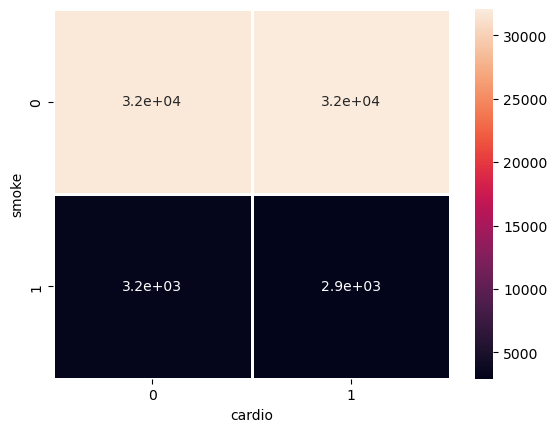

In [60]:
sns.heatmap(pd.crosstab(data.smoke, data.cardio), annot=True, linewidth=2, linecolor='white')

In [62]:
pd.crosstab(data.smoke, data.cardio) / data.shape[0]

cardio,0,1
smoke,,
0,0.454014,0.457857
1,0.046286,0.041843


<Axes: xlabel='cardio', ylabel='smoke'>

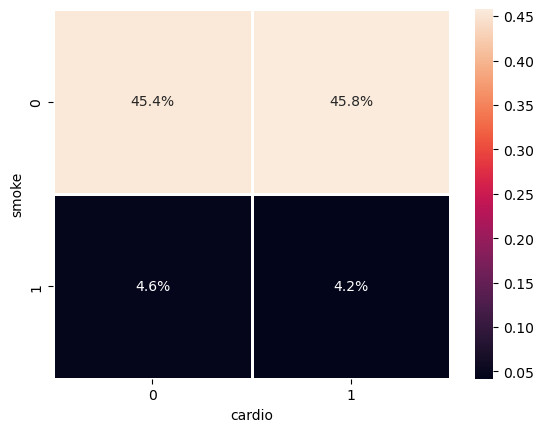

In [64]:
sns.heatmap(pd.crosstab(data.smoke, data.cardio) / data.shape[0], annot=True, linewidth=2, linecolor='white', fmt='.1%')

Из такой таблицы можно извлечь различные статистические метрики и провести анализ:

- <b>Частоты.</b> Вы можете видеть, сколько курящих и некурящих людей имеют сердечно-сосудичстые заболевания.
- <b>Проценты.</b> Можно вычислить процентное соотношение, например, какой процент курящих и некурящих людей имеют сердечно-сосудистые заболевания.
- <b>Хи-квадрат тест.</b> Этот статистический тест используется для определения, есть ли статистически значимая связь между категориальными переменными.

In [67]:
from scipy.stats import chi2_contingency

In [69]:
chi2_contingency(pd.crosstab(data.smoke, data.cardio))

Chi2ContingencyResult(statistic=16.677916738748436, pvalue=4.4293623605077656e-05, dof=1, expected_freq=array([[31934.6493, 31896.3507],
       [ 3086.3507,  3082.6493]]))

Малое значение p-value говорит о том, что связь статистически подтверждается.